# Домашняя работа №1

# Задача №1

    Построить график зависимости термического КПД паротурбинного цикла без промежуточного перегрева пара при следующих параметрах пара:  P0= 5, 10, 15, 20 MPa. Для каждого значения взять следующие значения температуры  t0= 300, 350, 400, 450, 500 градусов Цельсия,  Pk= 5 kPa. Принять давление за последней ступенью паровой турбины  P2=Pk . Термический КПД цикла оценивать без учета подогрева воды в питательном насосе и регенеративной системе.

In [1]:
import iapws
from iapws import IAPWS97 as gas
import matplotlib.pyplot as plt
import numpy as np
from typing import Optional, Tuple, List, Union

point_type = iapws.iapws97.IAPWS97

In [2]:
MPa = 10 ** 6
kPa = 10 ** 3
unit = 1 / MPa
to_kelvin = lambda x: x + 273.15 if x else None

In [3]:
## Начальные параметры:
p0 = [5, 10, 15, 20] 
def multimpa(number):
    return number * MPa
p0 = map(multimpa,p0)

t0 = [300, 350, 400, 450, 500]

t0 = map(to_kelvin,t0)
   

pk = 5 * kPa
p0 = list(p0)
t0 = list(t0)

In [4]:
def eff(a,b,c):
    point = []
    point_condenser_inlet = []
    point_pump_outlet=(gas(P = c * unit, x = 0))
    for j in range(len(a)):
        for i in range(len(b)):
            point.append(gas(P = a[j] * unit, T = b[i]))
            point_condenser_inlet.append(gas(P = c * unit, s = point[len(point)-1].s))
    
    useful_energy = []
    full_energy = []
    efficiency = []
    for j in range(len(point)):
        useful_energy.append(point[j].h - point_condenser_inlet[j].h)
        full_energy.append(point[j].h - point_pump_outlet.h)
        efficiency.append(round(useful_energy[j]/full_energy[j]*100,3))
    return efficiency

In [5]:
efficiency = eff(p0,t0,pk)
efficiency = dict({'5MPa': efficiency[0:5], '10MPa': efficiency[5:10], '15MPa': efficiency[10:15],'20MPa': efficiency[15:20],})

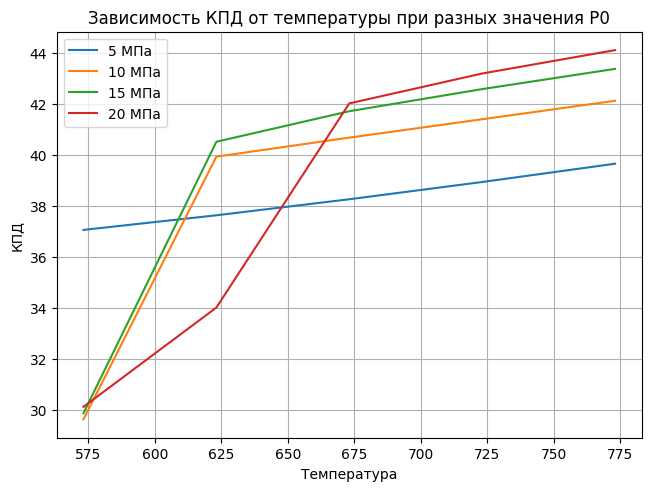

In [6]:
x = t0

plt.figure(layout = 'constrained')
plt.plot(x, efficiency['5MPa'], label = '5 МПа')  
plt.plot(x, efficiency['10MPa'], label = '10 МПа')  
plt.plot(x, efficiency['15MPa'], label = '15 МПа')
plt.plot(x, efficiency['20MPa'], label = '20 МПа')
plt.xlabel('Температура')
plt.ylabel('КПД')
plt.title("Зависимость КПД от температуры при разных значения P0")
plt.legend();
plt.grid()